In [1]:
# importing necessary libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading in the file

df = pd.read_csv(r'C:\Users\seunt\Downloads\ML tutorial\datasets\landprice1.csv')
df.head(3)

,Area,Distance,Crime Rate,Price
0,89,4,3.84,7.0
1,66,1,3.19,5.4
2,78,3,3.78,6.6


In [3]:
x = df.drop(['Price'], axis = 1)
y = df['Price']

In [4]:
area = df['Area'].values
distance = df['Distance'].values
crime = df['Crime Rate'].values

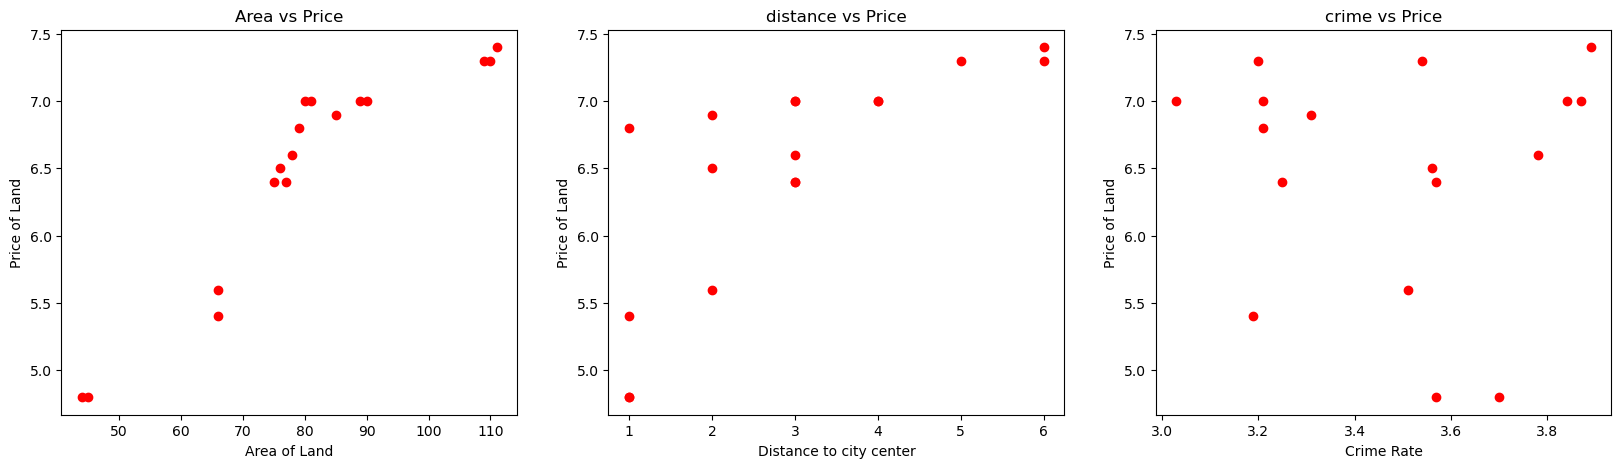

In [5]:
# checking for correlation between each independent variables and the dependent variable 'price'

fig, axs = plt.subplots(1,3, figsize = (20,5))
axs[0].set_title('Area vs Price')
axs[0].scatter(area, y, color = 'r')
axs[0].set_xlabel('Area of Land')
axs[0].set_ylabel('Price of Land')


axs[1].set_title('distance vs Price')
axs[1].scatter(distance, y, color = 'r')
axs[1].set_xlabel('Distance to city center')
axs[1].set_ylabel('Price of Land')

axs[2].set_title('crime vs Price')
axs[2].scatter(crime, y, color = 'r')
axs[2].set_xlabel('Crime Rate')
axs[2].set_ylabel('Price of Land')


plt.show()

- As observed from the subplot above, there is a linear relationship between Area of the land and the Price of land, simililary there seems to be a sort of linear relationship between Distance to city center and Price. But there's obviously no linear relationship between Crime rate and the Price, hence there's no correlation between them, and this kind of column may not be included as part of the feature selection for the model when predicting the Price of the land.

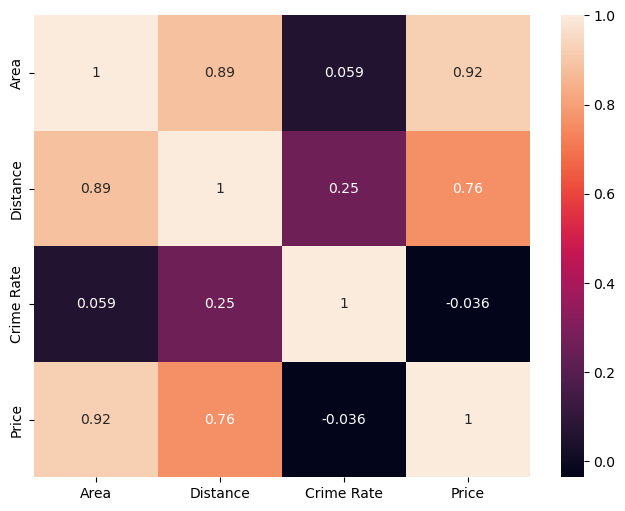

In [6]:
# plotting a correlation heatmap to further show the correlation between the independent variables and the dependent variable
# 'Price'

plt.figure(figsize = (8, 6))
cor = df.corr() # correlation check between independent variables and dependent varaible
sns.heatmap(data = cor, annot = True, cbar = True)

plt.show()

- In the corrrelation matrix above which shows the correlation of the independent variables(Area, Distance and Crime_rate) with the dependent variable (Price), we can see that only Area and Distance has a good correlation with Price and so they will be added to the model as predictor variables. We can see there is a very very very weak correlation between Crime_rate and the target variable Price, this kind of variable need not to be added to the model as it will only make the model complex.

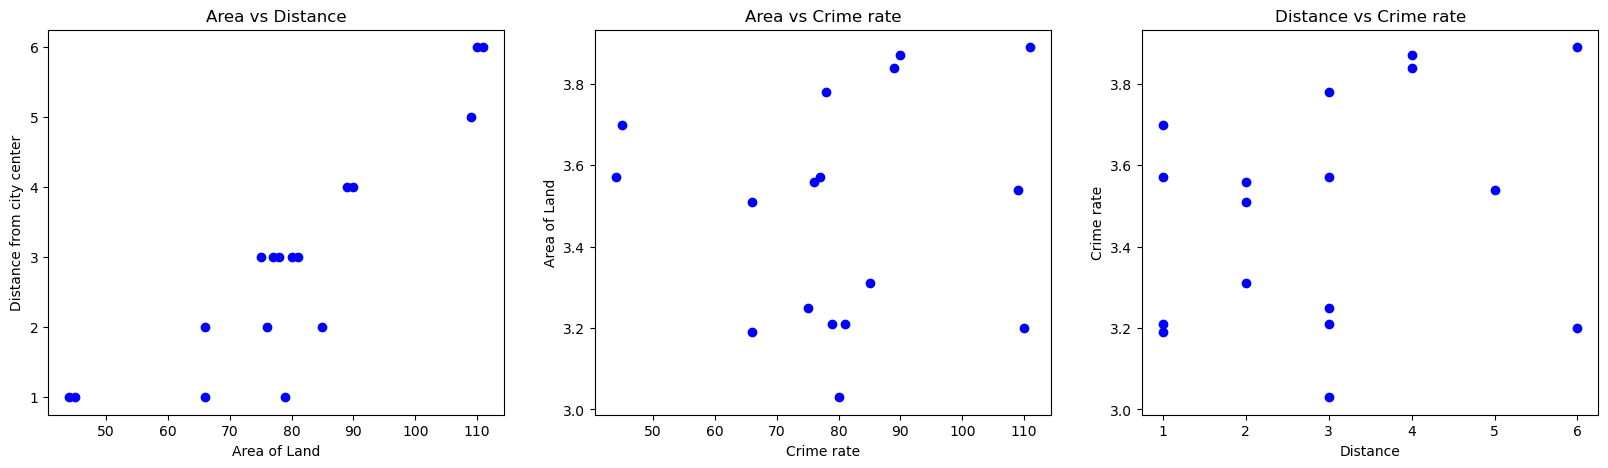

In [7]:
# checking for multicollinearity between the independent variables

fig, axs = plt.subplots(1,3, figsize = (20,5))
axs[0].set_title('Area vs Distance')
axs[0].scatter(area, distance, color = 'b')
axs[0].set_xlabel('Area of Land')
axs[0].set_ylabel('Distance from city center')


axs[1].set_title('Area vs Crime rate')
axs[1].scatter(area, crime, color = 'b')
axs[1].set_xlabel('Crime rate')
axs[1].set_ylabel('Area of Land')

axs[2].set_title('Distance vs Crime rate')
axs[2].scatter(distance, crime, color = 'b')
axs[2].set_xlabel('Distance')
axs[2].set_ylabel('Crime rate')

plt.show();

- From the subplot above, the Area of the Land and the Distance to city center seems to be multicorralted, depending on the threshold limit set, we may decide to drop one of the feature and pick only one out of the two to use for the model selection as multicollinearity makes the model complex and can reduce the accuracy of the model.

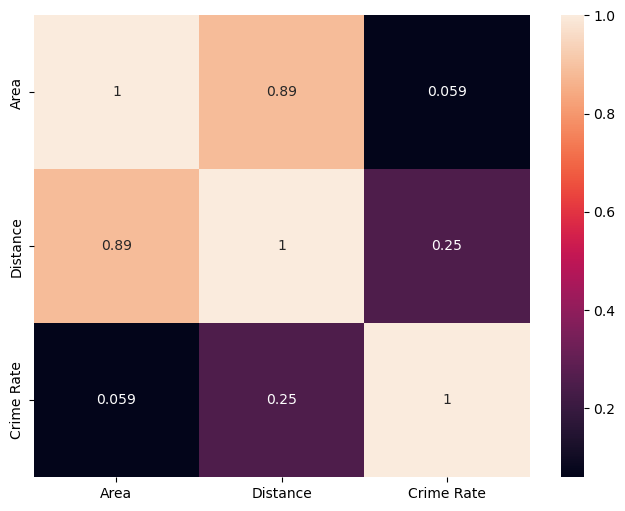

In [8]:
# plotting a correlation heatmap to re-check the correlation between independent variables, that is checking for
# 'Multicollinearity'

plt.figure(figsize = (8, 6))
cor = x.corr() # multicollinearity check between independent variables only
sns.heatmap(data = cor, annot = True, cbar = True)

plt.show()

- The heatmap above shows the multicollinearity between only the independent variables to check for variables that are highly correlated. When two independent variables are highly correlated, one of them need to be drop, adding both as predictor variables may make the model complex which may result in high error prediction by the model

- From the correlation heatmap,we can see a high correlation between 'Area of the land' and the 'Distance from city center', either of these two can be used depending on the threshold limit set for the correlation value. Using both features in the model may make the model complex and may result in high prediction error.

In [9]:
# splitting the dataset into training and testing set

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.4, random_state = 42)

In [10]:
# creating an instance for the linear regressor
lin_reg = LinearRegression()

# fitting the linear regresson on the training set
lin_reg.fit(X_train, Y_train)

# using the linear regressor to predict the training set so we can compare the result with the y_train to see how the model
# perform on the training set before moving on to predict the texting set
y_pred = lin_reg.predict(X_train)

In [11]:
X_train

,Area,Distance,Crime Rate
13,79,1,3.21
2,78,3,3.78
9,75,3,3.25
16,81,3,3.21
4,44,1,3.57
7,66,2,3.51
10,85,2,3.31
12,45,1,3.70
3,111,6,3.89
6,80,3,3.03


In [12]:
Y_train

13    6.8
2     6.6
9     6.4
16    7.0
4     4.8
7     5.6
10    6.9
12    4.8
3     7.4
6     7.0
Name: Price, dtype: float64

In [13]:
y_pred

array([6.81463033, 6.20328226, 6.49719924, 6.8172316 , 4.84323273,
       5.89861997, 6.97258019, 4.78377594, 7.55149272, 6.91795503])

- From the output from the 3 cells above, we can see that when the Area = 79 k square foot, Distance from city center = 1 mile, Crime Rate survey = 3.21, the Actual price the land was purchased from Y_train is 6.8 million dollars while the model predict from the result from y_pred that the Price of the land should be 6.8 million dollars as well. Comparing th other results as well, we can see that the model perform very well on the training data.

- Now let's see the model performance on the testing data.

In [14]:
# model prediction on texting data by fitting the linear regression on the testing data

y_pred1 = lin_reg.predict(X_test)

In [15]:
X_test

,Area,Distance,Crime Rate
0,89,4,3.84
1,66,1,3.19
5,77,3,3.57
15,76,2,3.56
11,110,6,3.20
14,90,4,3.87
8,109,5,3.54


In [16]:
Y_test

0     7.0
1     5.4
5     6.4
15    6.5
11    7.3
14    7.0
8     7.3
Name: Price, dtype: float64

In [17]:
y_pred1

array([6.63342797, 6.20926241, 6.32876569, 6.33571838, 8.07313599,
       6.65650449, 7.79122213])

- From the output from the 3 cells above, we can see that when the Area = 89 k square foot, Distance from city center = 4 miles, and Crime Rate survey = 3.84, the Actual price the land was purchased from Y_train is 7.0 million dollars while the model predict from the result from y_pred1 that the Price of the land should be 6.63 million dollars. Comparing th other results as well, we can see that the model perform very well on the testing data as well just as on the training data.

In [18]:
# now we are going to compute the R squared score for the training data first

# creating an instance for the r2 score
r_score = r2_score(Y_train, y_pred)

r_score

0.9585450484344298

In [19]:
# now let's compute the R squard score for the testing data as well and compared with that of the training score

r_score2 = r2_score(Y_test, y_pred1)

r_score2

0.34618710199386193

In [21]:
# now we know that the independent variable 'Crime Rate' is not formiming a good relationship with the target variable 'Price'
# now we are going to exclude that variable and see if the model is going to improve by checking the R-squared value.

df2 = x.drop(['Crime Rate'], axis = 1)
df2.head()

,Area,Distance
0,89,4
1,66,1
2,78,3
3,111,6
4,44,1


In [26]:
# splitting the dataset into training and testing set

X_train, X_test, Y_train, Y_test = train_test_split(df2, y, test_size = 0.4, random_state = 42)

lin_reg.fit(X_train, Y_train)

y_pred2 = lin_reg.predict(X_train)

y_pred3 = lin_reg.predict(X_test)

In [24]:
r_score3 = r2_score(Y_train, y_pred2)

r_score3

0.9131658184685754

In [27]:
r_score4 = r2_score(Y_test, y_pred3)

r_score4

0.6304339004002333

- Now we can clearly see that the model improved significantly with the removal of the independent variable 'Crime Rate'.